<a href="https://colab.research.google.com/github/SurajGavade01/Suraj_31_DEC_2025_Bank/blob/main/Mini_Project_IPL_DATA_SET_EDA_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [65]:
df1 = pd.read_csv("/content/IPL Matches 2008-2020.csv")
df2 = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")

In [67]:
matches_df = pd.read_csv("/content/IPL Matches 2008-2020.csv")
balls_df = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")


In [27]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [28]:
#converting the data colum
matches_df['date'] = pd.to_datetime(matches_df['date'])

#feature engineering > making a year columns from date
matches_df['season'] = matches_df['date'].dt.year

In [29]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

1. What was the count of matches played in each season?

In [33]:
matches_df['season'].value_counts()

,count
season,
2013,76
2012,74
2011,73
2014,60
2010,60
2020,60
2019,60
2016,60
2018,60


In [36]:
matches_per_season =  matches_df['season'].value_counts().sort_index()
matches_per_season

,count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


/tmp/ipython-input-2325636843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y=matches_per_season.values,palette='viridis')


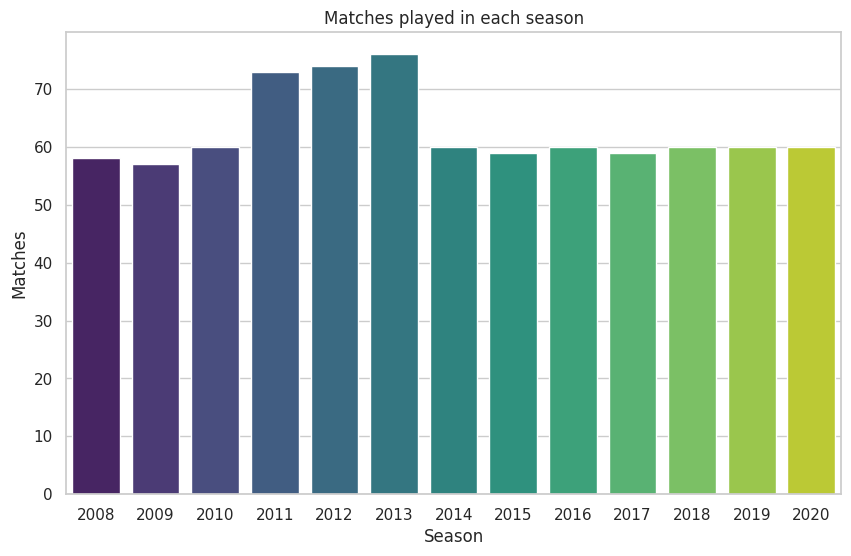

In [45]:
# Q1 ---- Visual , barplot

plt.figure(figsize=(10,6))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values,palette='viridis')
plt.title('Matches played in each season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

2. How many runs were scored in each season?

In [52]:
merge_df = balls_df.merge(matches_df[['id','season']])

In [56]:
runs_per_season = merge_df.groupby('season')['total_runs'].sum()
runs_per_season

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


/tmp/ipython-input-223520117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_per_season.index, y=runs_per_season.values,palette='viridis')


<Axes: xlabel='season'>

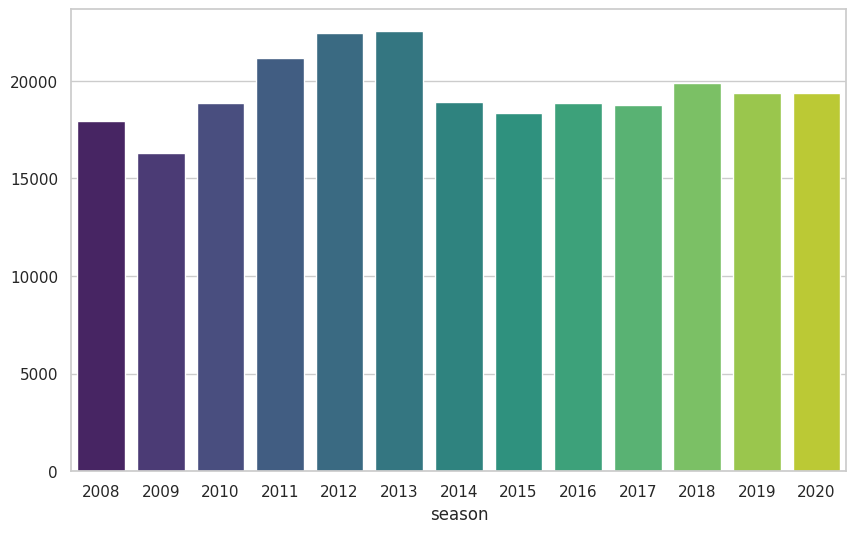

In [61]:
#Q2-----> Visual

plt.figure(figsize=(10,6))
sns.barplot(x=runs_per_season.index, y=runs_per_season.values,palette='viridis')

3. What were the runs scored per match in different seasons?

In [77]:
runs_scored = runs_per_season / matches_per_season
runs_scored

,0
season,
2008,309.258621
2009,286.315789
2010,314.400000
2011,289.780822
2012,303.418919
2013,296.592105
2014,315.150000
2015,310.711864
2016,314.366667


/tmp/ipython-input-1533007367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_scored.index, y=runs_scored.values,palette='viridis')


<Axes: xlabel='season'>

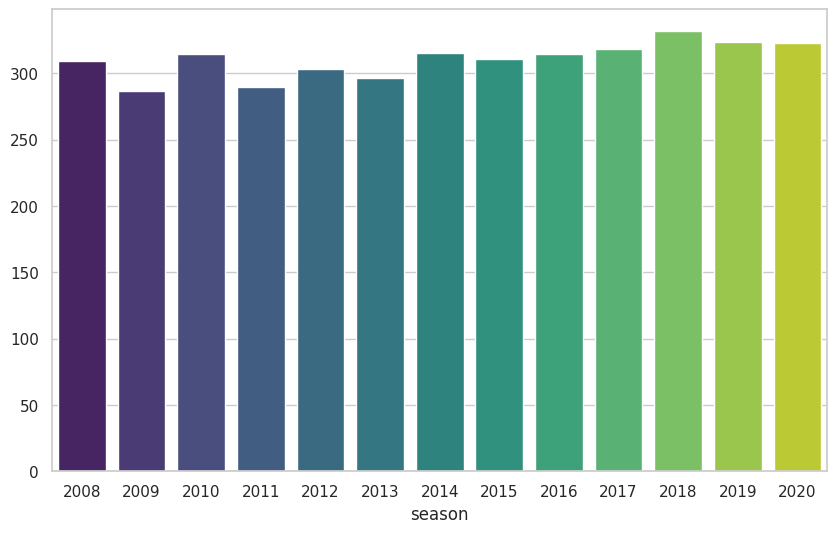

In [78]:
sns.barplot(x=runs_scored.index, y=runs_scored.values,palette='viridis')

4.Who has umpired the most?

In [124]:
uimped = pd.concat([matches_df['umpire1'],matches_df['umpire2']])
uimped.value_counts().idxmax()


'S Ravi'

/tmp/ipython-input-1700106394.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umpire_counts.values, y=umpire_counts.index,palette='viridis')


<Axes: ylabel='None'>

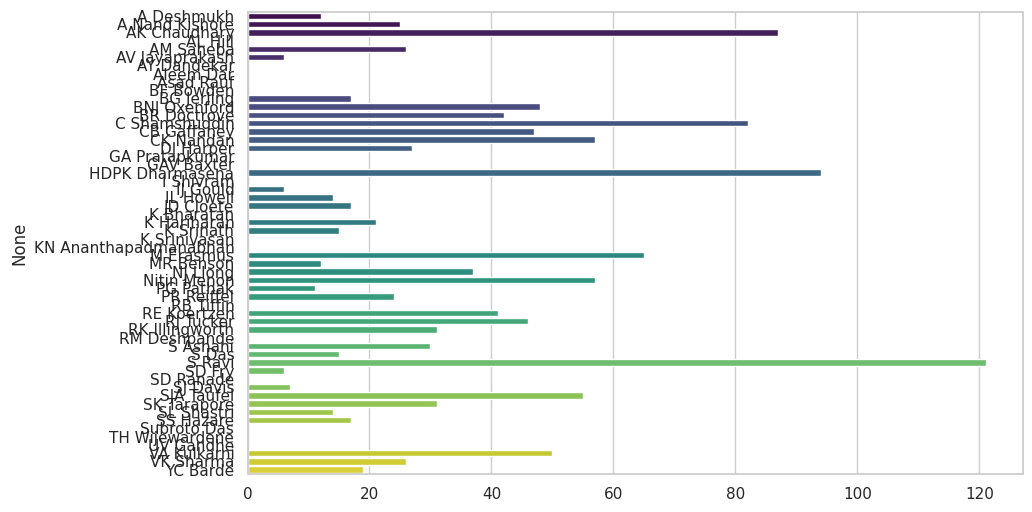

In [125]:

sns.barplot(x=umpire_counts.values, y=umpire_counts.index,palette='viridis')

5. Which team has won the most tosses?

In [99]:
toss_winners = matches_df['toss_winner'].value_counts()
toss_winners

,count
toss_winner,
Mumbai Indians,106
Kolkata Knight Riders,98
Chennai Super Kings,97
Rajasthan Royals,87
Royal Challengers Bangalore,87
Kings XI Punjab,85
Delhi Daredevils,80
Sunrisers Hyderabad,57
Deccan Chargers,43


/tmp/ipython-input-2926153422.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_winners.values, y=toss_winners.index,palette='viridis')


<Axes: ylabel='toss_winner'>

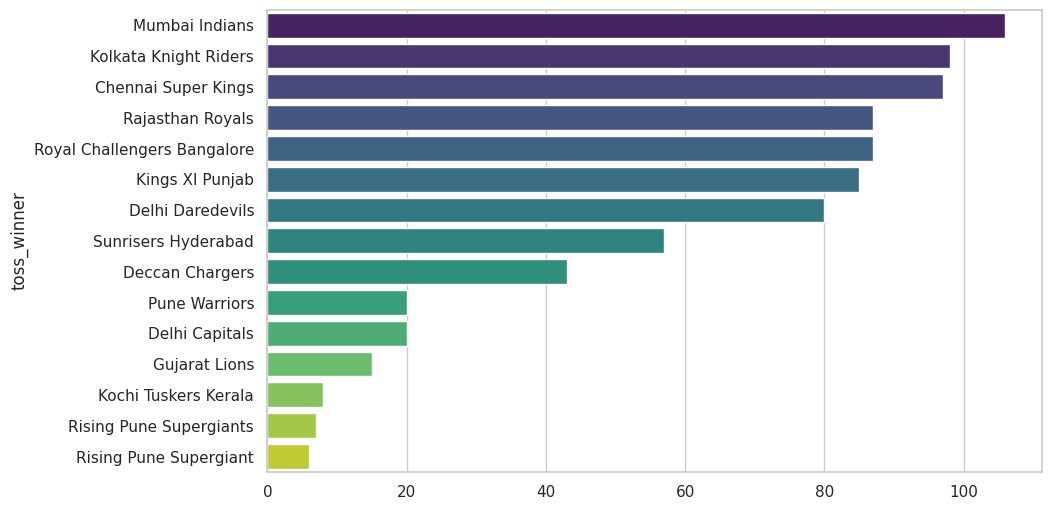

In [105]:
sns.barplot(x=toss_winners.values, y=toss_winners.index,palette='viridis')


6. What does the team decide after winning the toss?

In [106]:
winning_toss_decision = matches_df.groupby('toss_winner')['toss_decision'].value_counts()
winning_toss_decision

toss_winner                  toss_decision
Chennai Super Kings          bat              51
                             field            46
Deccan Chargers              bat              24
                             field            19
Delhi Capitals               field            13
                             bat               7
Delhi Daredevils             field            51
                             bat              29
Gujarat Lions                field            14
                             bat               1
Kings XI Punjab              field            58
                             bat              27
Kochi Tuskers Kerala         field             5
                             bat               3
Kolkata Knight Riders        field            64
                             bat              34
Mumbai Indians               field            58
                             bat              48
Pune Warriors                bat              11
                             field             9
Rajasthan Royals             field            53
                             bat              34
Rising Pune Supergiant       field             6
Rising Pune Supergiants      field             4
                             bat               3
Royal Challengers Bangalore  field            63
                             bat              24
Sunrisers Hyderabad          field            33
                             bat              24
Name: count, dtype: int64